In [2]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import librosa
import scipy as sp

In [3]:
data_path = "../data/musicnet/musicnet/musicnet/train_data/"

In [4]:
rate, wav = wavfile.read(data_path + "1727.wav")

In [5]:
rate

44100

In [6]:
wav

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

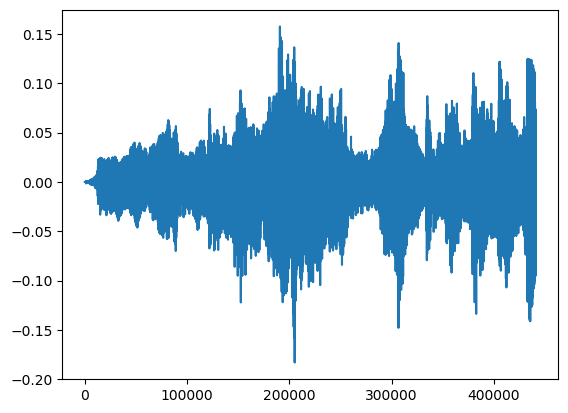

In [7]:
plt.plot(wav[0:rate*10])

In [8]:
n_fft = 1024
hop_length = 1024
ft = librosa.stft(wav, n_fft=n_fft, hop_length=hop_length)

In [9]:
def normalize_ft(x):
    def norm_pos(x):
        return (np.log10(x+1e-3) + 3)/3
    def norm_neg(x):
        return (-np.log10(-x+1e-3) - 3)/3
    return np.piecewise(x, [x<0, x>=0], [norm_neg, norm_pos])

def sepnorm_ft(x):
    r = np.real(x)
    i = np.imag(x)
    return normalize_ft(r), normalize_ft(i)

In [10]:
def unnormalize_ft(x):
    def unnorm_pos(x):
        return 10**(3*x-3) - 0.001
    def unnorm_neg(x):
        return -10**(-3*x-3) + 0.001
    return np.piecewise(x, [x<0, x>=0], [unnorm_neg, unnorm_pos])

def rec_ft(r, i):
    r = unnormalize_ft(r)
    i = unnormalize_ft(i)
    return r + 1j*i

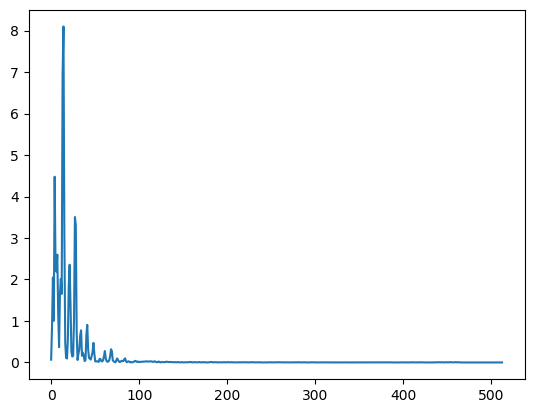

In [11]:
plt.plot(np.abs(ft)[:,400])

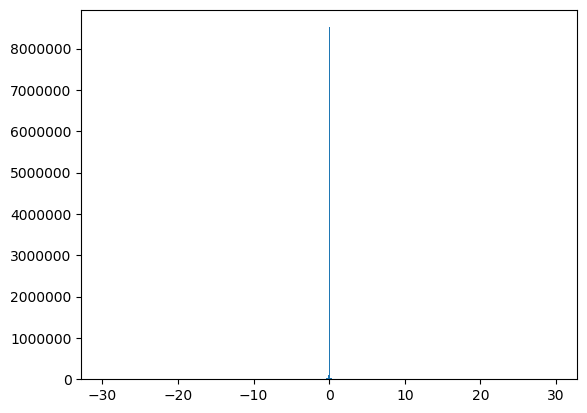

In [12]:
plt.hist(np.real(ft).flatten(), bins=1000)
plt.show()

In [13]:
ft_rn, ft_in = sepnorm_ft(ft)

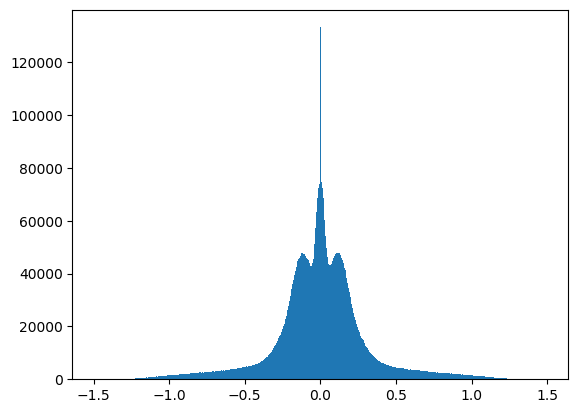

In [14]:
plt.hist(ft_rn.flatten(), bins=1000)
plt.show()

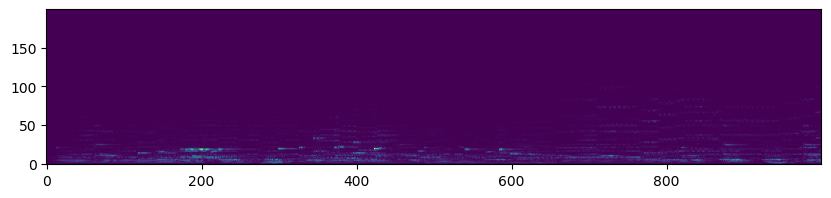

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plt.imshow(np.abs(ft)[:200,:1000])
ax.invert_yaxis()

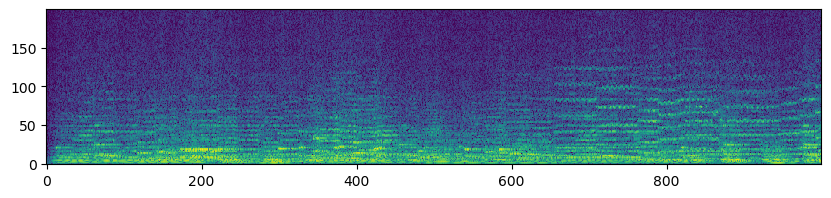

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
plt.imshow(np.abs(ft_rn)[:200,:1000])
ax.invert_yaxis()

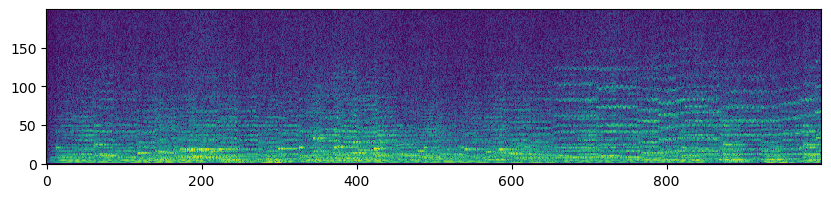

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
plt.imshow(np.abs(ft_in)[:200,:1000])
ax.invert_yaxis()

In [21]:
ft_out = rec_ft(ft_rn, ft_in)

In [22]:
wav_rec = librosa.istft(ft_out, n_fft=n_fft, hop_length=hop_length)

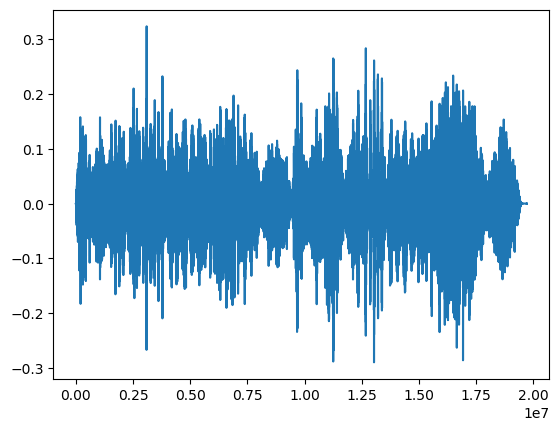

In [23]:
plt.plot(wav_rec)

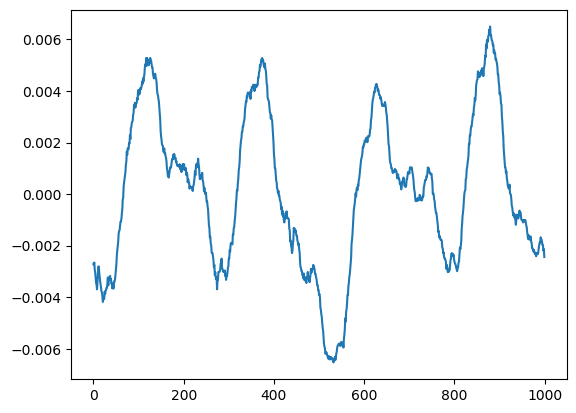

In [24]:
plt.plot(wav_rec[10000:11000])

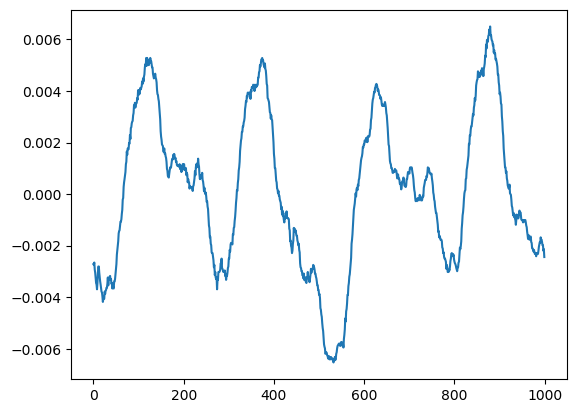

In [25]:
plt.plot(wav[10000:11000])

In [161]:
sp.io.wavfile.write("outputs/musicnet/1727_rec3.wav", rate, wav_rec)

In [162]:
n_fft = 2048
hop_length = 1024
mel = librosa.feature.melspectrogram(y=wav, sr=rate, n_fft=n_fft, hop_length=hop_length, fmax=8000)

In [163]:
mel_db = librosa.power_to_db(mel, ref=np.max)

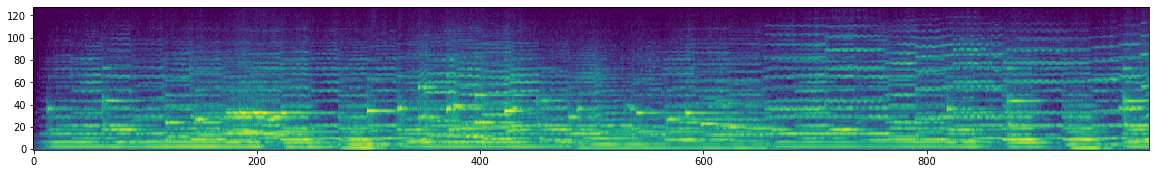

In [164]:
fig, ax = plt.subplots(figsize=(20,10))
plt.imshow(mel_db[:,:1000])
ax.invert_yaxis()

In [165]:
def normalize_mel(mel):
    return (mel + 80)/80
def unnormalize_mel(nmel):
    return nmel*80 - 80

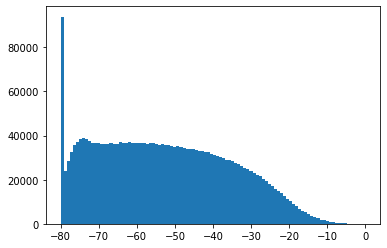

In [168]:
plt.hist(mel_db.flatten(), bins=100)
plt.show()